#Introduction

This kernel is a follow-up to a [previous kernel](https://www.kaggle.com/kasmithh/pubg-eda) that explored the PUBG Finish Placement dataset and found variables that were highly correlated with our target variable of winPlacePerc. A description of the dataset and the target of prediction can be found on the [PUBG competition page](https://www.kaggle.com/c/pubg-finish-placement-prediction/data).

#Decision Tree and Random Forest

To predict winPlacePerc, we will use a [random forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) which is an ensemble method that is essentially a collection of [decision trees](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor). [Decision trees](https://en.wikipedia.org/wiki/Decision_tree_model) are formed by making binary splits of  independent variables that begins at what is known as a node and makes binary splits until there are no statistically significant splits remaining. Statistically significant splits in decision trees are determined using a [Chi-Squared test](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test). Below is a very basic example of a decision tree that was created on the [Iris dataset](https://archive.ics.uci.edu/ml/datasets/iris)


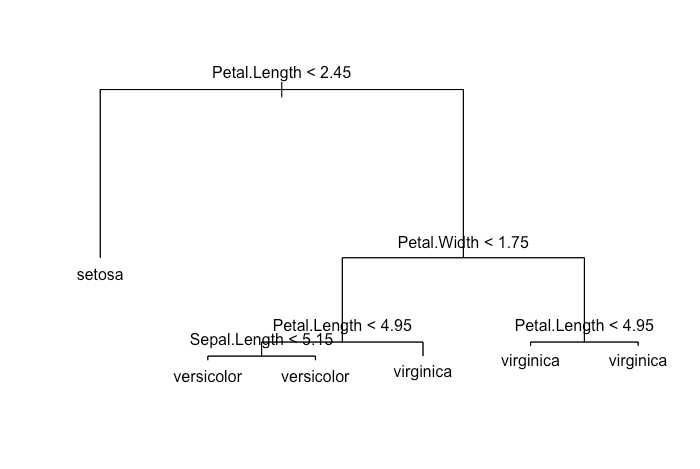

#Data Preparation

Before we can model our data using the decision tree and random forest algorithms, we must first prepare the data. After loading in the data, we will seperate it into independent (X) and dependent (Y) groups. In the previous kernel mentioned above, we identified four potential independent variables that can help us to predict winPlacePerc. These four variables will be in our X group, and the target variable of winPlacePerc will be in the Y group. We will also prepare X_test, which is comprised of our testing data, that will be used to make our final submission.

In [ ]:
#import necessary packages
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

The code below is to not only to load in the data, but also to [fix an error](https://stackoverflow.com/questions/31323499/sklearn-error-valueerror-input-contains-nan-infinity-or-a-value-too-large-for) that I received after running the model. In version two of the data, there are potentially null values introduced, so all null values are also dropped from the dataset.

In [ ]:
#load in data
train = pd.read_csv('../input/train_V2.csv')
train = train.dropna()
test = pd.read_csv('../input/test_V2.csv')
Submission = pd.read_csv('../input/sample_submission_V2.csv')
Submission['Id'] = Submission['Id'].astype(str)

In [ ]:
#split into X and Y groups
X = train[['weaponsAcquired', 'walkDistance', 'killPlace', 'boosts']]
Y = train['winPlacePerc']

In [ ]:
#create X_test for submission later
X_test = test[['weaponsAcquired', 'walkDistance', 'killPlace', 'boosts']]

In order to test which model performed better (between our decision tree and random forest), we will use a holdout set in order to validate each model's performance. To do this, we will take 30 percent of our training data and place them into a validation set.

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.30, random_state=123)

#Decision Tree vs. Random Forest

Below we will compare the performance of a single decision tree with  a random forest that is made up of 50 decision trees. The two models will then be compared using [mean absolute error](https://www.kaggle.com/c/pubg-finish-placement-prediction#evaluation) (MAE) which is the metric that is used to evalute submissions for this competition.

In [ ]:
#establish decision tree and get predictions
Tree = DecisionTreeRegressor()
Tree.fit(X_train, Y_train)
Tree_preds = Tree.predict(X_val)

In [ ]:
#establish decision tree and get predictions
Forest = RandomForestRegressor(n_estimators = 50, n_jobs = 3)
Forest.fit(X_train,Y_train)
Forest_preds = Forest.predict(X_val)

In [ ]:
print("Decision Tree MAE: {}".format(mean_absolute_error(Y_val, Tree_preds)))
print("Random Forest MAE: {}".format(mean_absolute_error(Y_val, Forest_preds)))

Based on the values above, we can see that the random forest performs better on our data. We will now use the model in order to predict X_test and submit those predictions.

In [ ]:
#predict X_test
Submission['winPlacePerc'] = Forest.predict(X_test)

#create submission file
Submission.to_csv("Submission.csv", index = False)

#Conclusion

In the future, there is a lot of fine tuning that could be done on our random forest model that would improve its performance. However, this model still makes for a very good baseline to improve on.